## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Data cleaning
#### 3. The elbow technique
#### 4. k-means clustering

In [1]:
#Importing libraries and data set

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'C:\Users\jmowe\OneDrive\Project 6 CF'

In [3]:
df = pd.read_csv(os.path.join(path,'Data', 'Df.csv'))

In [4]:
df.shape

(995267, 47)

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,Unnamed: 0.1,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2243071,A-6085031,Source1,2,2021-12-04 02:39:00,2021-12-04 03:57:12,39.642473,-75.730091,39.643605,-75.730432,...,0,0,0,0,0,0,0,0,0,0
1,3467479,A-7442811,Source1,2,2019-02-08 08:13:26,2019-02-08 08:42:57,42.316450,-83.739540,42.326380,-83.742110,...,0,0,0,0,0,0,1,1,1,1
2,1521500,A-5305115,Source1,2,2022-06-12 21:59:00,2022-06-13 17:45:00,47.419642,-122.288035,47.388912,-122.290675,...,0,0,0,0,0,0,0,0,1,0
3,1961791,A-5781263,Source1,2,2021-09-24 19:45:39,2021-09-24 21:24:34,47.008985,-104.833463,47.032495,-104.816263,...,0,0,0,0,0,0,0,0,1,1
4,1710760,A-5510249,Source1,2,2021-07-03 16:50:19,2021-07-03 17:55:55,32.924447,-96.779241,32.925337,-96.789489,...,0,0,0,0,0,0,1,1,1,1


### Some data cleaning that this exercised revealed to me that I should do before exploring these graphs

In [6]:
unique_values = df['Wind_Speed(mph)'].unique()
print(unique_values)

[1.040e+01 3.500e+00 4.600e+00 1.150e+01 5.800e+00 8.100e+00 1.610e+01
 1.380e+01 9.200e+00 1.500e+01 1.270e+01 1.960e+01 1.730e+01 2.880e+01
 6.900e+00 2.650e+01 1.300e+01 2.190e+01 2.300e+01 2.070e+01 7.000e+00
 1.840e+01 2.530e+01 0.000e+00 6.000e+00 9.000e+00 1.600e+01 2.000e+01
 1.800e+01 3.000e+00 8.000e+00 1.200e+01 5.000e+00 1.000e+01 1.400e+01
 2.760e+01 2.420e+01 2.990e+01 3.680e+01 3.570e+01 3.450e+01 3.340e+01
 2.000e+00 1.700e+01 2.100e+01 2.200e+01 3.220e+01 3.110e+01 2.500e+01
 2.400e+01 2.900e+01 3.000e+01 2.600e+01 3.500e+01 2.800e+01 3.800e+01
 3.200e+01 3.700e+01 4.100e+01 3.100e+01 4.800e+01 3.600e+01 4.400e+01
 3.900e+01 4.500e+01 3.300e+01 4.000e+01 4.300e+01 6.600e+01 4.700e+01
 6.400e+01 5.100e+01 1.900e+02 1.000e+00 4.600e+01 5.500e+01 8.100e+01
 1.170e+02 5.200e+01 5.400e+01 8.200e+01 1.000e+02 9.300e+01 1.220e+02
 1.050e+02 1.850e+02 4.900e+01 5.300e+01 1.270e+02 1.210e+02 6.000e+01
 1.300e+02 5.900e+01 6.700e+01 1.250e+02 1.290e+02 1.320e+02 1.190e+02
 5.800

In [7]:
# Define a function to convert exponential notation to rounded numbers
def convert_to_rounded(value):
    return '{:.1f}'.format(float(value))

df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].apply(lambda x: convert_to_rounded(x))

In [8]:
unique_values = df['Wind_Speed(mph)'].unique()
print(unique_values)

['10.4' '3.5' '4.6' '11.5' '5.8' '8.1' '16.1' '13.8' '9.2' '15.0' '12.7'
 '19.6' '17.3' '28.8' '6.9' '26.5' '13.0' '21.9' '23.0' '20.7' '7.0'
 '18.4' '25.3' '0.0' '6.0' '9.0' '16.0' '20.0' '18.0' '3.0' '8.0' '12.0'
 '5.0' '10.0' '14.0' '27.6' '24.2' '29.9' '36.8' '35.7' '34.5' '33.4'
 '2.0' '17.0' '21.0' '22.0' '32.2' '31.1' '25.0' '24.0' '29.0' '30.0'
 '26.0' '35.0' '28.0' '38.0' '32.0' '37.0' '41.0' '31.0' '48.0' '36.0'
 '44.0' '39.0' '45.0' '33.0' '40.0' '43.0' '66.0' '47.0' '64.0' '51.0'
 '190.0' '1.0' '46.0' '55.0' '81.0' '117.0' '52.0' '54.0' '82.0' '100.0'
 '93.0' '122.0' '105.0' '185.0' '49.0' '53.0' '127.0' '121.0' '60.0'
 '130.0' '59.0' '67.0' '125.0' '129.0' '132.0' '119.0' '58.0' '812.0'
 '75.0' '1087.0' '110.0' '98.0' '211.0' '232.0' '131.0' '984.0' '61.0'
 '169.0' '42.6' '41.4' '43.7' '44.9' '39.1' '142.0' '161.0']


In [9]:
unique_values = df['Temperature(F)'].unique()
print(unique_values)

[ 42.1  37.   33.1  32.   33.8  28.   26.6  25.   23.   21.   21.9  21.2
  22.5  24.1  30.   28.9  30.9  19.9  15.8  17.1  14.   15.3  16.   12.
  15.1  18.   19.   17.6  10.    6.1   3.   30.2  34.   33.   39.9  41.
  43.   36.   35.1  39.   45.   46.   27.   26.1  33.4  52.   50.   57.
  59.   71.   54.   66.  101.   83.   81.   79.   60.   58.   56.   48.
  53.   75.   77.   92.   64.   74.   73.   68.   61.   84.   63.   49.
  62.   72.   51.   67.   76.   70.   69.   55.   65.   80.   78.  100.
  85.   87.   89.   37.9  37.4  38.   28.2   9.   10.9  12.9  17.2   3.9
   1.9  -0.4  -0.9  32.2  35.4   8.1   7.   28.4  47.   38.7  31.6  44.1
   1.   19.4   5.   -2.9  17.   26.8  31.1  46.4  36.1  24.8  44.8  82.
  31.8  29.3  42.   41.5  42.4  39.2  93.   95.   97.   96.   88.   94.
  98.   99.   91.   35.6  45.7  44.6  41.4  42.3  40.5  42.8  22.   32.7
  36.5  33.6   8.6  29.8  27.3  19.8  35.2  32.9  41.9  38.5  43.7  18.5
  12.2  10.4  34.9  24.   24.4  29.1  35.8  20.   40.1  30.

In [10]:
unique_values = df['Precipitation(in)'].unique()
print(unique_values)

[0.00e+00 1.00e-02 8.00e-02 5.00e-02 3.00e-02 2.00e-02 4.00e-02 1.00e-01
 1.80e-01 2.20e-01 9.00e-02 1.10e-01 1.20e-01 6.00e-02 7.00e-02 1.30e-01
 3.20e-01 1.50e-01 2.10e-01 2.40e-01 5.30e-01 9.00e-01 1.40e-01 2.00e-01
 1.90e-01 2.50e-01 2.70e-01 3.40e-01 1.70e-01 1.60e-01 5.00e-01 3.00e-01
 9.93e+00 5.50e-01 7.60e-01 2.30e-01 4.50e-01 2.60e-01 2.73e+00 6.00e-01
 2.80e-01 9.97e+00 9.95e+00 9.99e+00 2.90e-01 4.10e-01 9.98e+00 9.96e+00
 3.90e-01 4.40e-01 7.80e-01 5.40e-01 4.30e-01 5.70e-01 7.90e-01 3.70e-01
 3.30e-01 1.15e+00 5.20e-01 6.20e-01 5.10e-01 3.10e-01 7.20e-01 4.80e-01
 4.70e-01 3.50e-01 4.00e-01 9.80e-01 4.20e-01 4.60e-01 3.80e-01 7.50e-01
 1.01e+00 7.10e-01 7.70e-01 7.00e-01 3.60e-01 4.90e-01 5.60e-01 1.08e+00
 6.10e-01 6.70e-01 7.40e-01 8.90e-01 1.95e+00 9.70e-01 8.20e-01 1.07e+00
 1.39e+00 1.80e+00 6.40e-01 5.90e-01 1.19e+00 6.50e-01 1.67e+00 6.80e-01
 1.10e+00 2.05e+00 8.80e-01 1.57e+00 6.30e-01 6.60e-01 1.42e+00 1.21e+00
 9.90e-01 1.56e+00 1.11e+00 1.27e+00 1.22e+00 1.04e

In [11]:
# Define a function to convert exponential notation to rounded numbers
def convert_to_rounded(value):
    return '{:.2f}'.format(float(value))

df['Precipitation(in)'] = df['Precipitation(in)'].apply(lambda x: convert_to_rounded(x))

In [12]:
unique_values = df['Precipitation(in)'].unique()
print(unique_values)

['0.00' '0.01' '0.08' '0.05' '0.03' '0.02' '0.04' '0.10' '0.18' '0.22'
 '0.09' '0.11' '0.12' '0.06' '0.07' '0.13' '0.32' '0.15' '0.21' '0.24'
 '0.53' '0.90' '0.14' '0.20' '0.19' '0.25' '0.27' '0.34' '0.17' '0.16'
 '0.50' '0.30' '9.93' '0.55' '0.76' '0.23' '0.45' '0.26' '2.73' '0.60'
 '0.28' '9.97' '9.95' '9.99' '0.29' '0.41' '9.98' '9.96' '0.39' '0.44'
 '0.78' '0.54' '0.43' '0.57' '0.79' '0.37' '0.33' '1.15' '0.52' '0.62'
 '0.51' '0.31' '0.72' '0.48' '0.47' '0.35' '0.40' '0.98' '0.42' '0.46'
 '0.38' '0.75' '1.01' '0.71' '0.77' '0.70' '0.36' '0.49' '0.56' '1.08'
 '0.61' '0.67' '0.74' '0.89' '1.95' '0.97' '0.82' '1.07' '1.39' '1.80'
 '0.64' '0.59' '1.19' '0.65' '1.67' '0.68' '1.10' '2.05' '0.88' '1.57'
 '0.63' '0.66' '1.42' '1.21' '0.99' '1.56' '1.11' '1.27' '1.22' '1.04'
 '0.86' '0.58' '1.40' '1.28' '1.77' '0.80' '2.31' '1.17' '1.02' '0.94'
 '1.64' '0.83' '1.47' '1.43' '1.05' '1.38' '0.84' '1.03' '2.11' '1.06'
 '1.18' '1.00' '0.93' '1.13' '0.96' '1.58' '0.69' '1.82' '0.91' '1.37'
 '1.52

In [13]:
unique_values = df['Wind_Chill(F)'].unique()
print(unique_values)

[ 3.61e+01  2.98e+01  3.00e+01  2.87e+01  2.96e+01  2.44e+01  2.86e+01
  2.70e+01  1.61e+01  1.52e+01  1.55e+01  1.01e+01  9.30e+00  9.80e+00
  8.90e+00  1.24e+01  1.37e+01  2.00e+01  1.82e+01  1.87e+01  2.04e+01
  7.30e+00  2.70e+00  6.00e-01  5.70e+00  9.90e+00 -2.50e+00  1.20e+00
  2.80e+00  3.40e+00  5.80e+00  6.60e+00  3.00e-01  1.25e+01  3.00e+00
  7.10e+00  1.10e+01  7.60e+00  1.11e+01  4.80e+00  5.00e-01 -2.00e+00
  5.30e+00  4.20e+00 -3.00e+00  1.70e+00  2.30e+00  5.00e+00 -1.70e+00
  1.81e+01  3.20e+00  1.50e+00  6.20e+00  7.70e+00  1.17e+01  8.20e+00
  6.70e+00  3.90e+00 -6.50e+00 -1.22e+01 -4.40e+00 -1.00e-01  1.45e+01
  2.64e+01  3.45e+01  2.43e+01  2.80e+01  2.61e+01  2.42e+01  2.88e+01
  2.19e+01  2.77e+01  2.17e+01  3.34e+01  3.25e+01  2.38e+01  3.31e+01
  3.64e+01  2.48e+01  2.59e+01  2.55e+01  2.12e+01  2.81e+01  3.84e+01
  3.74e+01  2.46e+01  1.98e+01  2.85e+01  2.26e+01  1.60e+01  2.02e+01
  2.11e+01  1.91e+01  2.01e+01  2.30e+01  2.75e+01  2.20e+01  4.19e+01
  3.54

In [16]:
# Define a function to convert exponential notation to rounded numbers
def convert_to_rounded(value):
    return '{:.1f}'.format(float(value))

df['Wind_Chill(F)'] = df['Wind_Chill(F)'].apply(lambda x: convert_to_rounded(x))

In [17]:
unique_values = df['Wind_Chill(F)'].unique()
print(unique_values)

['36.1' '29.8' '30.0' '28.7' '29.6' '24.4' '28.6' '27.0' '16.1' '15.2'
 '15.5' '10.1' '9.3' '9.8' '8.9' '12.4' '13.7' '20.0' '18.2' '18.7' '20.4'
 '7.3' '2.7' '0.6' '5.7' '9.9' '-2.5' '1.2' '2.8' '3.4' '5.8' '6.6' '0.3'
 '12.5' '3.0' '7.1' '11.0' '7.6' '11.1' '4.8' '0.5' '-2.0' '5.3' '4.2'
 '-3.0' '1.7' '2.3' '5.0' '-1.7' '18.1' '3.2' '1.5' '6.2' '7.7' '11.7'
 '8.2' '6.7' '3.9' '-6.5' '-12.2' '-4.4' '-0.1' '14.5' '26.4' '34.5'
 '24.3' '28.0' '26.1' '24.2' '28.8' '21.9' '27.7' '21.7' '33.4' '32.5'
 '23.8' '33.1' '36.4' '24.8' '25.9' '25.5' '21.2' '28.1' '38.4' '37.4'
 '24.6' '19.8' '28.5' '22.6' '16.0' '20.2' '21.1' '19.1' '20.1' '23.0'
 '27.5' '22.0' '41.9' '35.4' '12.3' '13.1' '23.2' '25.2' '31.1' '31.8'
 '24.1' '22.8' '52.0' '50.0' '57.0' '43.5' '59.0' '43.1' '71.0' '54.0'
 '26.2' '23.5' '66.0' '101.0' '83.0' '81.0' '79.0' '60.0' '58.0' '56.0'
 '46.0' '53.0' '75.0' '77.0' '92.0' '64.0' '74.0' '73.0' '68.0' '61.0'
 '84.0' '63.0' '49.0' '62.0' '72.0' '51.0' '67.0' '76.0' '70.0' '69.0'


In [18]:
df['Precipitation(in)'].max()

'9.99'

In [19]:
df['Wind_Speed(mph)'].dtype

dtype('O')

In [20]:
df['Precipitation(in)'].dtype

dtype('O')

In [21]:
df['Wind_Chill(F)'].dtype

dtype('O')

In [22]:
df['Temperature(F)'].dtype

dtype('float64')

In [23]:
#It looks like precipation, wind speed, and wind chill were converted to objects when rounding. Converting them to float data types

df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].astype(float)

In [30]:
df['Precipitation(in)'] = df['Precipitation(in)'].astype(float)

In [24]:
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].astype(float)

In [44]:
# Anything over wind speed 250 is an error, as the highest wind speed ever recorded is 253mph. Removing the 4 or 5 values above 250.

df = df[df['Wind_Speed(mph)'] <= 250]

In [45]:
df['Wind_Speed(mph)'].max()

232.0

In [26]:
df['Temperature(F)'].max()

196.0

In [27]:
# Some unrealistic temperatures here as well, dropping anything over 130(F)

df = df[df['Temperature(F)'] <= 130]

#### Moving on to prep for ML graphs

In [7]:
#Creating a subset of only integers or float 64 for following step
data_types = df.dtypes

In [8]:
mask = (data_types == np.int64) | (data_types == np.float64)

In [9]:
sub = df.loc[:, mask]


In [10]:
sub.head()

,Unnamed: 0.1,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2243071,2,39.642473,-75.730091,39.643605,-75.730432,0.080,44.0,42.0,60.0,...,0,0,0,0,0,0,0,0,0,0
1,3467479,2,42.316450,-83.739540,42.326380,-83.742110,0.699,16.0,0.1,77.0,...,0,0,0,0,0,0,1,1,1,1
2,1521500,2,47.419642,-122.288035,47.388912,-122.290675,2.127,52.0,52.0,74.0,...,0,0,0,0,0,0,0,0,1,0
3,1961791,2,47.008985,-104.833463,47.032495,-104.816263,1.815,54.0,54.0,29.0,...,0,0,0,0,0,0,0,0,1,1
4,1710760,2,32.924447,-96.779241,32.925337,-96.789489,0.598,81.0,81.0,51.0,...,0,0,0,0,0,0,1,1,1,1


#### The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

[-1.0488437433162117e+18,
 -2.6247859565062496e+17,
 -1.1650433517761616e+17,
 -6.553171255472619e+16,
 -4.191666680615262e+16,
 -2.9121184627127076e+16,
 -2.141636360229516e+16,
 -1.6384856053113928e+16,
 -1.2945340054850074e+16]

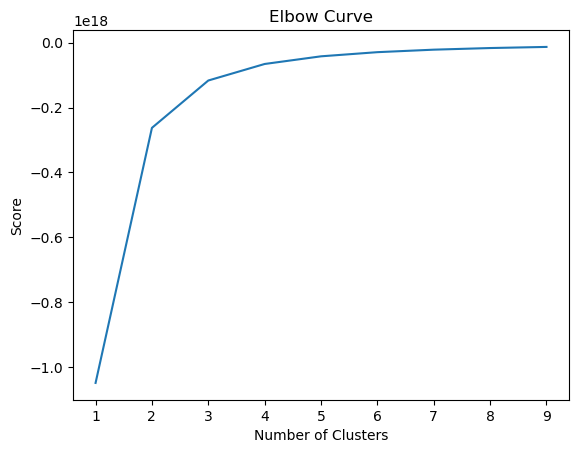

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:
# I'm going to start with 3 clusters and see how that goes.

#### k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)


In [16]:
# Fit the k-means object to the data.

kmeans.fit(sub)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
sub['clusters'] = kmeans.fit_predict(sub)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmowe\AppData\Local\Temp\ipykernel_17516\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [18]:
sub.head()

,Unnamed: 0.1,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,clusters
0,2243071,2,39.642473,-75.730091,39.643605,-75.730432,0.080,44.0,42.0,60.0,...,0,0,0,0,0,0,0,0,0,0
1,3467479,2,42.316450,-83.739540,42.326380,-83.742110,0.699,16.0,0.1,77.0,...,0,0,0,0,0,1,1,1,1,2
2,1521500,2,47.419642,-122.288035,47.388912,-122.290675,2.127,52.0,52.0,74.0,...,0,0,0,0,0,0,0,1,0,0
3,1961791,2,47.008985,-104.833463,47.032495,-104.816263,1.815,54.0,54.0,29.0,...,0,0,0,0,0,0,0,1,1,0
4,1710760,2,32.924447,-96.779241,32.925337,-96.789489,0.598,81.0,81.0,51.0,...,0,0,0,0,0,1,1,1,1,0


In [19]:
sub['clusters'].value_counts()

1    332182
0    332037
2    331048
Name: clusters, dtype: int64

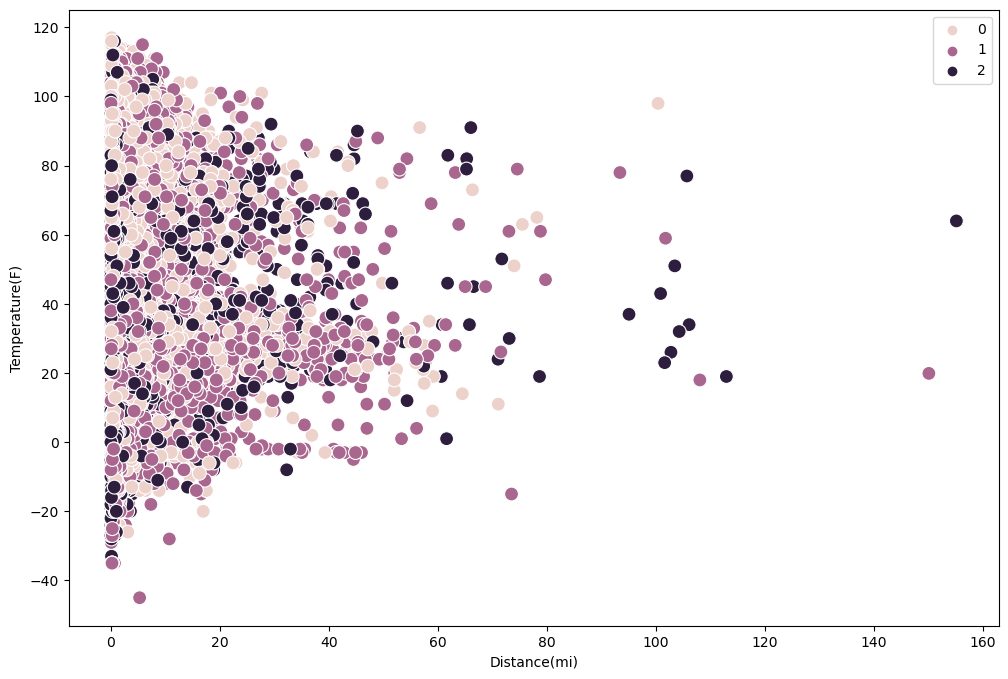

In [26]:
# Plot the clusters for the "Distance(mi)" and "Temperature" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Distance(mi)'], y=sub['Temperature(F)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance(mi)') # Label x-axis.
plt.ylabel('Temperature(F)') # Label y-axis.
plt.show()

In [ ]:
# I'm not really sure how to interpret the clusters from this.

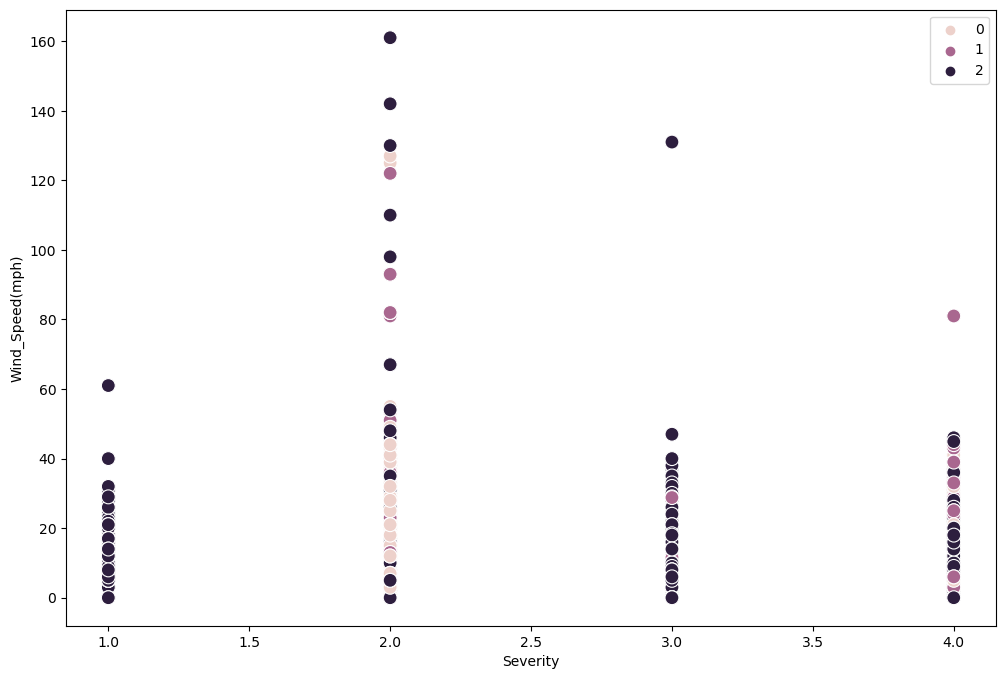

In [27]:
# Plot the clusters for the "Wind Chill(F)" and "Wind Speed(mph)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Severity'], y=sub['Wind_Speed(mph)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Severity') 
plt.ylabel('Wind_Speed(mph)') 
plt.show()

In [ ]:
# Not sure why there is a weird indention or gap in plotted values. Clusters are more gathered together here.

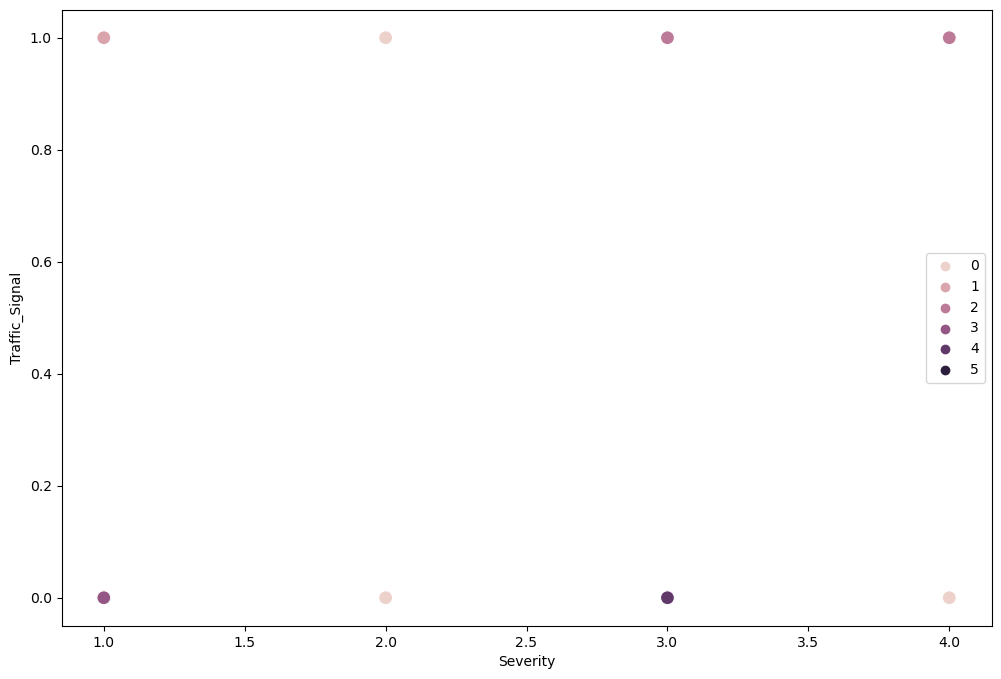

In [46]:
# Severity and Traffic Signal

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Severity'], y=df['Traffic_Signal'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Severity') 
plt.ylabel('Traffic_Signal') 
plt.show()

In [42]:
# I don't know how to get Severity into play with these graphs. Maybe normalization is needed. Traffic_Signal is also a 1/0 for values so that also likely doesn't help.
# I was hoping Severity cluster would give me more insight into the way the ML clustered the accident data.

In [48]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'light purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'light pink'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 4, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 5, 'cluster'] = 'black'

In [50]:
#Exploring the statistical analysis of the clusters

ub.groupby('cluster').agg({'Temperature(F)':['mean', 'median'], 
                         'Wind_Chill(F)':['mean', 'median'], 
                         'Distance(mi)':['mean', 'median'],
                         'Wind_Speed(mph)' :['mean', 'median'],
                            'Severity':['mean', 'median'],
                                          'Traffic_Signal':['mean', 'median']})


Temperature(F)        Wind_Chill(F)        Distance(mi)         \
                       mean median          mean median         mean median   
cluster                                                                       
black             66.300739   68.0     66.246967   68.0     0.810845  0.273   
dark purple       52.221270   53.0     51.201105   53.0     0.822876  0.218   
light pink        74.230896   73.0     74.199309   73.0     0.830775  0.219   
light purple      80.907510   81.0     80.907510   81.0     0.757836  0.233   
pink              29.345305   31.0     22.666366   25.0     1.119192  0.434   
purple            50.687611   51.0     48.776424   51.0     0.818090  0.311   

             Wind_Speed(mph)         Severity        Traffic_Signal         
                        mean median      mean median           mean median  
cluster                                                                     
black               6.175593    6.0  2.099913    2.0       0.100736    0.0  
dark purple         5.451972    5.0  2.033775    2.0       0.066003    0.0  
light pink          7.705022    7.0  2.030216    2.0       0.087288    0.0  
light purple        9.199806    9.0  2.074254    2.0       0.107586    0.0  
pink                8.268353    7.0  2.119926    2.0       0.073297    0.0  
purple              8.459344    8.0  2.107939    2.0       0.112410    0.0

In [52]:
#Exporting the cleaned df

df.to_csv(os.path.join(path, 'Data','df_clean.csv'))

In [51]:
# I think I'll definitely have to revisit this and play around with the cluster count. As for relevancy to future steps, it would be nice if the algorithm can identify factors
# that contribute to one another, and which factors lead to more accident likelihood or accident severity.